<a href="https://colab.research.google.com/github/joselvira/BiomecanicaPython/blob/master/Notebooks/ManejoArchivosCarpetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manejo de archivos y carpetas para cargar datos
## Configuración del entorno

En este apartado veremos cómo cargar datos a partir de archivos guardados en Drive.

Desde otros entornos de programación de Python que trabajen con archivos locales, basta con tener la ruta de la carpeta que contiene los archivos. Pero desde Google Colab, al funcionar en la nube, por problemas de seguridad es necesario darle permisos antes para acceder a nuestro Drive.

Tendremos que incluir al principio del notebook este código. Al ejecutarlo aparece un enlace en el que hay que pinchar, seleccionar la cuenta donde tengamos los archivos a analizar, permitir y copiar el código que aparece en la pantalla. Después, pegarlo donde dice "Enter your authorization code".

In [43]:
import os
from pathlib import Path #para gestión de archivos y carpetas
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Lo siguiente muestra un enlace para que otorguemos permiso para acceder a nuestro Drive
drive.mount('/googledrive', force_remount=True)

Mounted at /googledrive


Para probar que funciona correctamente, entramos en la carpeta donde hayamos guardado los materiales del seminario y pedimos un listado de los archivos y carpetas que contiene.

In [44]:
#cambiamos al directorio de trabajo y comprobamos que estamos dentro del mismo
#Carpetas posibles: My Drive: para Mi unidad; Shared drives: para Unidades compartidas; .shortcut-targets-by-id/ ... identificador: para carpetas compartidas por otros
ruta_trabajo = Path('/googledrive/My Drive/Colab Notebooks/SeminarioProgramacionPython')
os.chdir(ruta_trabajo)
print('Estamos en la carpeta', os.getcwd())
%ls

Estamos en la carpeta /googledrive/My Drive/Colab Notebooks/SeminarioProgramacionPython
3.5-Bucles.ipynb           ArchivosEjemplos/      ManejoArchivosCarpetas.ipynb
5.0-GraficarCarpeta.ipynb  GraficarCarpeta.ipynb


En este caso, en la variable *ruta* hemos guardado la dirección donde se encuentran los archivos. *googledrive* es el nombre que hemos dado a lo que sería la unidad de disco de nuestro Drive. *My Drive* es como se llama la unidad de disco normal donde almacenamos los archivos en el Drive (en otras partes lo traduce como *Mi unidad*, pero aquí tenemos que mantener su nombre original). Lo demás son las carpetas y subcarpetas hasta llegar a donde queremos. Hay que separar cada elemento con la barra de dividir y se pueden ir añadiendo hasta llegar al nombre del archivo.

In [45]:
ruta_Archivo = ruta_trabajo / 'Subcarpeta1' / 'Subcarpeta2' / 'NombreArchivo.txt'

#O lo que es lo mismo
ruta_Archivo2 = ruta_trabajo / 'Subcarpeta1/Subcarpeta2/NombreArchivo.txt'

Con esto no se crea ningún archivo, simplemente guardamos en la variable ruta_archivo la dirección donde se encuentra el archivo.


Una vez enlazado con el Drive, lo siguiente es conocer las características de los archivos que queremos analizar. Normalmente los aparatos que utilizamos para medir generan archivos que **pueden tener distintos formatos**, como por ejemplo: usa o no **encabezados**; tiene un apartado al inicio con información; número de línea en el que se encuentra el encabezado y los datos; caracter que se utiliza como **separador** de datos (puede ser la coma, el punto y coma, el espacio o el tabulador).

Todo esto lo tenemos que tener encuenta a la hora de leer los archivos para cargar sus datos y poder trabajar con ellos.

Por ejemplo, en la siguiente imagen se puede ver un archivo con datos de un test de equilibrio abierto con el Bloc de notas. Se puede apreciar que la primera línea presenta un encabezado con los nombres de las variables que incluye (en columnas). Los datos en sí empiezan en la segunda fila. Cada fila representa un instante temporal de datos. En este caso el caracter separador de datos es la coma.

In [ ]:
from IPython.display import Image
Image(url="https://github.com/joselvira/BiomecanicaPython/raw/master/Imagenes/ArchivoCOPCrudo.png", height=400)

Sin embargo, en el siguiente ejemplo al principio hay una serie de información sobre el registro, pero el encabezado empieza en la línea 18 (además tiene dos líneas de encabezado) y los datos en sí en la 20. En este caso, el separador es el tabulador.

In [ ]:
Image(url="https://github.com/joselvira/BiomecanicaPython/raw/master/Imagenes/ArchivoSaltosCrudo.png", height=400)

## Obtener todos los archivos de una carpeta concreta

Normalmente nos interesa trabajar con un conjunto de archivos con la misma extensión, que se encuentran dentro de una misma carpeta. En este caso, nos interesa buscar los archivos con extensión *.txt*. Lo podemos hacer automáticamente de la siguiente manera.

In [46]:
ruta_busqueda = ruta_trabajo / 'ArchivosEjemplos/PlatFuerzas/COP'
#Selecciona solo los archivos en la carpeta
lista_artchivos = list(ruta_busqueda.glob('*.txt'))

lista_artchivos #muestra lo que ha encontrado

[PosixPath('/googledrive/My Drive/Colab Notebooks/SeminarioProgramacionPython/ArchivosEjemplos/PlatFuerzas/COP/OtroTipoPlat-COP.txt')]

En este caso solo muestra un archivo porque es lo que hay en la carpeta principal de esa ruta.
Si queremos que encuentre en la misma búsqueda todos los archivos en la carpeta y en las subcarpetas, tenemos que jugar con el número de asteriscos en la instrucción

In [47]:
#Selecciona los archivos en la carpeta y en sus subcarpetas
lista_artchivos = list(ruta_busqueda.glob('**/*.txt'))
lista_artchivos

[PosixPath('/googledrive/My Drive/Colab Notebooks/SeminarioProgramacionPython/ArchivosEjemplos/PlatFuerzas/COP/OtroTipoPlat-COP.txt'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/SeminarioProgramacionPython/ArchivosEjemplos/PlatFuerzas/COP/Bioware/BiowareCOP-1.txt'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/SeminarioProgramacionPython/ArchivosEjemplos/PlatFuerzas/COP/Bioware/BiowareCOP-4.txt'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/SeminarioProgramacionPython/ArchivosEjemplos/PlatFuerzas/COP/Bioware/BiowareCOP-6.txt'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/SeminarioProgramacionPython/ArchivosEjemplos/PlatFuerzas/COP/Bioware/BiowareCOP-5.txt'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/SeminarioProgramacionPython/ArchivosEjemplos/PlatFuerzas/COP/Bioware/BiowareCOP-3.txt'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/SeminarioProgramacionPython/ArchivosEjemplos/PlatFuerzas/COP/Bioware/BiowareCOP-2.txt'),
 PosixPath('/googledrive/My Dri

In [48]:
#Selecciona los archivos en sus subcarpetas pero NO en la carpeta
lista_artchivos = list(ruta_busqueda.glob('*/*.txt'))
lista_artchivos

[PosixPath('/googledrive/My Drive/Colab Notebooks/SeminarioProgramacionPython/ArchivosEjemplos/PlatFuerzas/COP/Bioware/BiowareCOP-1.txt'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/SeminarioProgramacionPython/ArchivosEjemplos/PlatFuerzas/COP/Bioware/BiowareCOP-4.txt'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/SeminarioProgramacionPython/ArchivosEjemplos/PlatFuerzas/COP/Bioware/BiowareCOP-6.txt'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/SeminarioProgramacionPython/ArchivosEjemplos/PlatFuerzas/COP/Bioware/BiowareCOP-5.txt'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/SeminarioProgramacionPython/ArchivosEjemplos/PlatFuerzas/COP/Bioware/BiowareCOP-3.txt'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/SeminarioProgramacionPython/ArchivosEjemplos/PlatFuerzas/COP/Bioware/BiowareCOP-2.txt'),
 PosixPath('/googledrive/My Drive/Colab Notebooks/SeminarioProgramacionPython/ArchivosEjemplos/PlatFuerzas/COP/Bioware/BiowareCOP-7-1000Hz.txt')]

## Obtener información sobre el nombre de las carpetas o del archivo

Muchas veces necesitaremos conocer el nombre del archivo, o su extensión, o el nombre de la carpeta inmediatamente superior. Podemos hacerlo añadiendo a la ruta del archivo los atributos: .name, .stem, .suffix, parent.

In [49]:
#Carga en la variable archivo_concreto uno de los archivos encontrados en listaArchivos 
archivo_concreto = lista_artchivos[0]

print('Nombre completo de la ruta:', archivo_concreto)
print('Nombre y extensión:', archivo_concreto.name)
print('Nombre sin extensión:', archivo_concreto.stem)
print('Extensión sola:', archivo_concreto.suffix)
print('Ruta completa de carpetas sin el archivo:', archivo_concreto.parent)
print('Nombre de la carpeta en la que se encuentra el archivo:', archivo_concreto.parent.parts[-1])

Nombre completo de la ruta: /googledrive/My Drive/Colab Notebooks/SeminarioProgramacionPython/ArchivosEjemplos/PlatFuerzas/COP/Bioware/BiowareCOP-1.txt
Nombre y extensión: BiowareCOP-1.txt
Nombre sin extensión: BiowareCOP-1
Extensión sola: .txt
Ruta completa de carpetas sin el archivo: /googledrive/My Drive/Colab Notebooks/SeminarioProgramacionPython/ArchivosEjemplos/PlatFuerzas/COP/Bioware
Nombre de la carpeta en la que se encuentra el archivo: Bioware


Ahora vamos a probar a cargar un archivo concreto. Son archivos de la plataforma de fuerzas Kistler, en los que el encabezado está en la fila 18 y los datos en la 20. **ATENCIÓN:** el número de fila se cuenta empezando en el 0.

In [50]:
Datos = pd.read_csv(lista_artchivos[3], header=17, skiprows=[18], sep='\t')
Datos.head() #muestra las primeras 5 filas del archivo

,abs time (s),Ax,Ay
0,0.00,-0.020883,-0.006324
1,0.02,-0.019612,-0.005615
2,0.04,-0.018094,-0.005102
3,0.06,-0.016109,-0.005453
4,0.08,-0.014059,-0.006008


## Ejemplos de archivos tipo que solemos utilizar

En este apartado podrás ver algunos formatos de archivos de los aparatos que solemos utilizar en Biomecánica. Puedes utilizarlos como ejemplo según las características de los archivos que quieras analizar.

In [51]:
#Metemos en la variable ruta_trabajo la ruta general de los archivos de ejemplo
ruta_trabajo = Path('/googledrive/My Drive/Colab Notebooks/SeminarioProgramacionPython/ArchivosEjemplos')

### Archivos de plataforma Kistler
Estos archivos salen del software Bioware, que controla la plataforma.

   abs time (s)        Fx        Fy          Fz
0         0.000  1.340692 -1.545765  701.964775
1         0.001  1.580361 -1.266329  703.393150
2         0.002  1.380490 -1.426170  701.648857
3         0.003  1.340692 -1.625571  702.282661
4         0.004  1.460380 -1.426170  702.283669
(8000, 4)


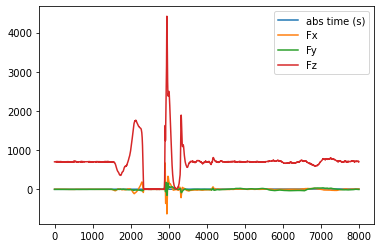

In [52]:
carpeta_original = ruta_trabajo / 'PlatFuerzas/Saltos'
nombreArchivo = 'BiowareSaltos-1.txt'
separador= '\t'

#carga el archivo
Datos = pd.read_csv(carpeta_original / nombreArchivo, header=17, skiprows=[18], sep=separador)

print(Datos.head())
print(Datos.shape)

#Presenta una gráfica con los datos
Datos.plot()



   abs time (s)        Ax        Ay
0          0.00  0.002981 -0.007996
1          0.02  0.002145 -0.005870
2          0.04  0.002224 -0.003794
3          0.06  0.002765 -0.001867
4          0.08  0.002656 -0.000416
(500, 3)


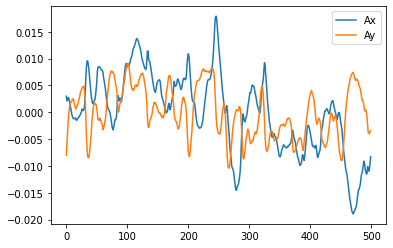

In [ ]:
carpeta_original = ruta_trabajo / 'PlatFuerzas/COP/Bioware'
nombreArchivo = 'BiowareCOP-1.txt'
separador= '\t'

#carga el archivo
Datos = pd.read_csv(carpeta_original / nombreArchivo, header=17, skiprows=[18], sep=separador)

print(Datos.head())
print(Datos.shape)

#Presenta una gráfica con los datos
Datos[['Ax', 'Ay']].plot()



### Archivos programa seguimiento COP

   tiempo    COPX   COPY  TargetX  TargetY    ErrX    ErrY  ErrRadial
0   0.000  87.216  2.133    0.000   50.000 -87.216  47.867   99.48846
1   0.002  87.232  2.194   -0.063   50.000 -87.294  47.806   99.52747
2   0.004  87.260  2.246   -0.126   50.000 -87.385  47.754   99.58253
3   0.006  87.297  2.325   -0.188   50.000 -87.486  47.675   99.63274
4   0.008  87.368  2.414   -0.251   49.999 -87.619  47.585   99.70695
(10000, 8)


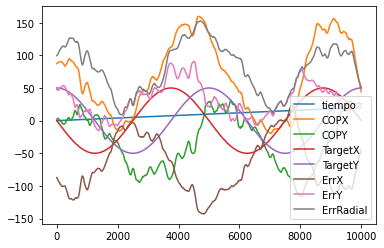

In [ ]:
carpeta_original = ruta_trabajo / 'PlatFuerzas/COP/SeguimientoCOP'
nombreArchivo = 'SeguimientoCOP-1.csv'
separador= ','

#carga el archivo
Datos = pd.read_csv(carpeta_original / nombreArchivo, sep=separador)

print(Datos.head())
print(Datos.shape)

#Presenta una gráfica con los datos
Datos.plot()

### Archivos dinamómetro isocinético
Estos archivos tienen el encabezado un poco raro, por lo que es mejor ponerles el encabezado a mano.

   tiempo  Torque  Posic  PosicAnat  Velocidad
0       0     0.0  195.1        111        0.0
1      10     1.8  195.1        111        0.2
2      20    18.8  195.1        111        1.5
3      30    28.5  195.1        111        4.2
4      40    43.8  195.0        111       13.8
(484, 5)


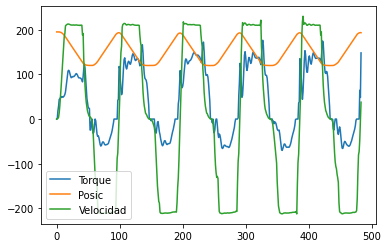

In [ ]:
carpeta_original = ruta_trabajo / 'Isocinetico'
nombreArchivo = 'Isocinetico-1.txt'
separador= '\t'

#carga el archivo
Datos = pd.read_csv(carpeta_original / nombreArchivo, header = None, skiprows=6, delim_whitespace=True)

#nombra las columnas
Datos.columns=['tiempo','Torque','Posic','PosicAnat','Velocidad']

print(Datos.head())
print(Datos.shape)

#Presenta una gráfica con los datos
Datos[['Torque', 'Posic', 'Velocidad']].plot()

### Archivos del EMG Mega

      RI     RS     VM     VL
0  -36.0 -215.0  -80.0  -54.0
1  -40.0 -166.0 -166.0   28.0
2  -58.0  -62.0 -137.0   46.0
3 -219.0   42.0  -28.0  126.0
4 -264.0   95.0   74.0  257.0
(14210, 4)


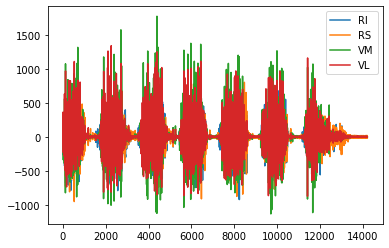

In [ ]:
carpeta_original = ruta_trabajo / 'EMG'
nombreArchivo = 'EMG-1.ASC'
separador= '\t'

#carga el archivo
Datos = pd.read_csv(carpeta_original / nombreArchivo, header = None, skiprows=46, delim_whitespace=True)

#Nos quedamos solo con las columnas que interesan
Datos = Datos.iloc[:, 0:4]

#nombra las columnas
Datos.columns=['RI','RS','VM', 'VL']

print(Datos.head())
print(Datos.shape)

#Presenta una gráfica con los datos
Datos.plot()

###  Archivos acelerómetro móvil


#### Ejemplo con aplicación Accelerometer Analyzer

Esta aplicación incluye líneas con comentarios que empiezan por #, al principio y al final del archivo. Se puede especificar que no las tenga en cuenta

       X      Y       Z  timediff
0  0.529 -0.016  10.043        11
1  0.574  0.137  10.064         9
2  0.644  0.241  10.043        11
3  0.640  0.311  10.038         9
4  0.654  0.370   9.975        13
(438, 4)


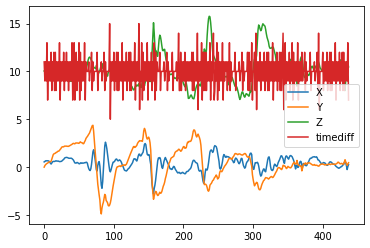

In [ ]:
carpeta_original = ruta_trabajo / 'AcelerometroMovil'
nombreArchivo = 'Acelerometro__2.txt'
separador= '\t'

#carga el archivo
Datos = pd.read_csv(carpeta_original / nombreArchivo, header=None, comment='#', delim_whitespace=True)

#nombra las columnas
Datos.columns=['X','Y','Z', 'timediff']

print(Datos.head())
print(Datos.shape)

#Presenta una gráfica con los datos
Datos.plot()

#### Ejemplo con aplicación Physics Toolbox Suite

Esta aplicación utiliza y guarda el separador decimal de acuerdo con la configuración del móvil, que puede ser punto o coma. En este ejemplo utiliza la coma como separador decimal, por lo que hay que especificarlo al cargar el archivo.

    time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)
0  0.007      0.0043      0.0477     -0.7227       0.724
1  0.007     -0.0789      0.1228     -0.4905       0.512
2  0.008     -0.1045      0.1258     -0.3965       0.429
3  0.008     -0.1489      0.0967     -0.2278       0.289
4  0.008     -0.1559     -0.0045     -0.1357       0.207
(3439, 5)


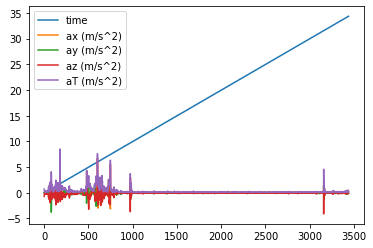

In [ ]:
carpeta_original = ruta_trabajo / 'AcelerometroMovil'
nombreArchivo = 'PhysicsToolboxsuite-OjosAbiertos.csv'
separador= ';'
separador_decimal = ','

#carga el archivo
Datos = pd.read_csv(carpeta_original / nombreArchivo, sep=separador, decimal=separador_decimal)

print(Datos.head())
print(Datos.shape)

#Presenta una gráfica con los datos
Datos.plot()

### Archivos del pulsómetro Polar

   Sample rate      Time  HR (bpm)  ...  Temperatures (C) Power (W)  Unnamed: 11
0          1.0  00:00:00        99  ...              27.9       NaN          NaN
1          NaN  00:00:01        99  ...              27.9       NaN          NaN
2          NaN  00:00:02       100  ...              27.6       NaN          NaN
3          NaN  00:00:03       101  ...              27.8       NaN          NaN
4          NaN  00:00:04       101  ...              27.9       NaN          NaN

[5 rows x 12 columns]
(2926, 12)


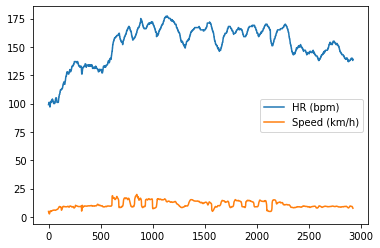

In [ ]:
carpeta_original = ruta_trabajo / 'Pulsometro'
nombreArchivo = 'Pulsometro-1.csv'
separador= ','

#carga el archivo
Datos = pd.read_csv(carpeta_original / nombreArchivo, header=2, sep=separador)

print(Datos.head())
print(Datos.shape)

#Presenta una gráfica con los datos
Datos[['HR (bpm)', 'Speed (km/h)']].plot()

### Archivos del analizador de gases

Estos archivos, aunque tengan la extensión *.xls* no tienen formato de archivos Excel sino que son archivos de texto. Por eso se pueden abrir con la función *pd.read_csv()*

    Time      Load      Speed    ...  VO2/kg     V'O2      V'CO2  
0    00:15          0       0.4  ...       7.5       656       531
1    00:30         78       5.0  ...       9.7       848       666
2    00:45         78       5.0  ...      12.6      1101       913
3    01:00         78       5.0  ...      15.7      1371      1025
4    01:15         78       5.0  ...      20.4      1779      1344

[5 rows x 12 columns]
(54, 12)
    Time      Load      Speed    ...    FAT     PETCO2     PECO2  
0    00:15          0       0.4  ...       276     -          2.79
1    00:30         78       5.0  ...       414     -          2.72
2    00:45         78       5.0  ...       427     -          2.93
3    01:00         78       5.0  ...       814     -          2.99
4    01:15         78       5.0  ...      1027     -          3.32

[5 rows x 12 columns]
(54, 12)


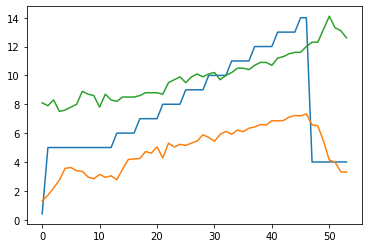

In [53]:
carpeta_original = ruta_trabajo / 'AnalizadorGases'
separador= '\t'

#PRIMER ARCHIVO
nombreArchivo = 'AnalizadorGases1-1.xls'

#carga el archivo
Datos = pd.read_csv(carpeta_original / nombreArchivo, skiprows=[1,2], skipfooter=9, sep=separador, engine='python')

print(Datos.head())
print(Datos.shape)

#SEGUNDO ARCHIVO
nombreArchivo = 'AnalizadorGases2-1.xls'

#carga el archivo
Datos2 = pd.read_csv(carpeta_original / nombreArchivo, skiprows=[1,2], skipfooter=9, sep=separador, engine='python')

print(Datos2.head())
print(Datos2.shape)

#Presenta una gráfica con los datos
Datos[' Speed  '].plot()
(Datos[" V\'O2   "]/500).plot()
(Datos2['  RER   ']*10).plot()



### Archivos seguimiento mirada

  Avi TimeStamp   Frame  ...  Mouse x   Mouse y
0    0:00:00.83  115348  ...    295.0     605.0
1    0:00:00.87  115349  ...    295.0     605.0
2    0:00:00.90  115350  ...    295.0     605.0
3    0:00:00.94  115351  ...    295.0     605.0
4    0:00:00.97  115352  ...    295.0     605.0

[5 rows x 12 columns]
(6459, 12)


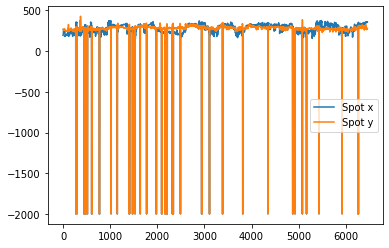

In [ ]:
carpeta_original = ruta_trabajo / 'SeguimientoMirada'
nombreArchivo = 'sist_seg-2.csv'
separador= ','

#carga el archivo
Datos = pd.read_csv(carpeta_original / nombreArchivo, sep=separador, skiprows=1, skipfooter=12, engine='python')

print(Datos.head())
print(Datos.shape)

#Presenta una gráfica con los datos
Datos[['Spot x', 'Spot y']].plot()


### Archivos Polhemus originales

Estos archivos tienen un formato bastante complejo, con filas con distinto número de columnas y con las coordenadas de cada sensor alternas, por lo que hay que gestionarlo convenientemente. Por eso en este caso no se usa la función *pd.read_csv* sino la *pd.read_fwf()*.

   0       1       2       3        4       5        6    7
0  1  54.697 -16.286 -11.005  112.856 -56.338 -177.050  NaN
1  2  60.531 -30.234 -59.828  -69.244 -80.946 -142.149  NaN
2  3  71.400 -25.959 -38.769   75.835 -10.411  101.014  1.0
3  1  54.698 -16.294 -11.003  112.776 -56.401 -177.038  NaN
4  2  60.535 -30.234 -59.822  -69.340 -80.940 -142.059  NaN
(127359, 8)


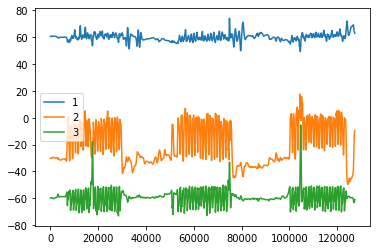

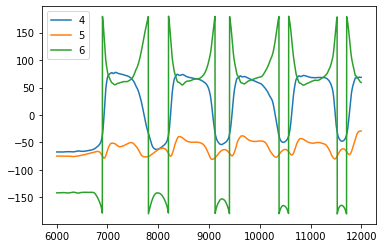

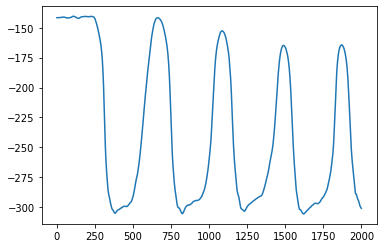

In [ ]:
carpeta_original = ruta_trabajo / 'Polhemus'
nombreArchivo = 'PolhemusOriginal-1.txt'
separador= ' '

#carga el archivo
Datos = pd.read_fwf(carpeta_original / nombreArchivo, header=None, skipfooter=1)

print(Datos.head())
print(Datos.shape)

#Separa por sensores
sensor1 = Datos[0::3]
sensor2 = Datos[1::3]
sensor3 = Datos[2::3]

#Presenta una gráfica con los datos
#posicion ejes x, y, z
sensor2.iloc[:, 1:4].plot()
plt.show()

#ángulos
sensor2.iloc[2000:4000, 4:7].plot() 
plt.show()

#Para corregir el salto a los 180º
plt.plot(np.degrees(np.unwrap(np.radians(sensor2.iloc[2000:4000, 6])))) #ángulo con saltos corregidos



### Archivos Polhemus organizados

Estos archivos provienen del Polhemus tras pasar por un procesamiento que organiza los datos.

       0       1      2        3   ...      14      15      16      17
0  55.425  55.806  1.468  110.009  ...  33.879  68.498 -22.023  97.918
1  55.357  55.717  0.168  110.745  ...  33.909  68.354 -22.139  97.859
2  55.308  55.588 -1.029  111.403  ...  33.924  68.185 -22.227  97.842
3  55.220  55.456 -2.261  112.196  ...  33.932  68.062 -22.269  97.839
4  55.141  55.286 -3.409  112.903  ...  33.955  67.967 -22.301  97.833

[5 rows x 18 columns]
(351, 18)


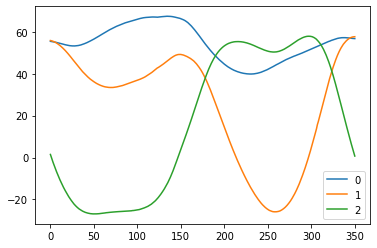

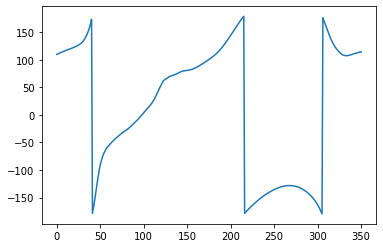

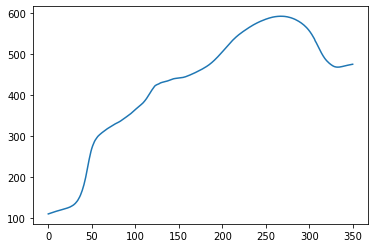

In [ ]:
carpeta_original = ruta_trabajo / 'Polhemus'
nombreArchivo = 'PolhemusOrganizado-2.txt'
separador= '\t'

#carga el archivo
Datos = pd.read_csv(carpeta_original / nombreArchivo, header=None, sep=separador)

print(Datos.head())
print(Datos.shape)

#Presenta una gráfica con los datos
#posicion
Datos.iloc[:, :3].plot()
plt.show()

#ángulos
Datos.iloc[:, 3].plot() #ángulo con saltos en 180º
plt.show()
plt.plot(np.degrees(np.unwrap(np.radians(Datos.iloc[:, 3])))) #ángulo con saltos corregidos
plt.show()



### Archivos Excel

   Tiempo(ms)  Ace. X (G)  Ace. Y (G)  Ace. Z (G)
0           0        0.03       -0.21        1.17
1           5        0.03       -0.21        1.14
2          10        0.00       -0.21        1.14
3          15        0.00       -0.10        1.09
4          20        0.00       -0.10        1.07
(5792, 4)


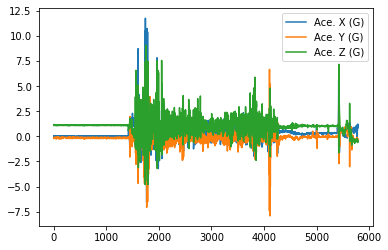

In [ ]:
carpeta_original = ruta_trabajo / 'Excel'
nombreArchivo = 'Excel-1.xlsx'
nombreHoja = 'Datos' #también puede ser el número del orden de hoja

#carga el archivo
Datos = pd.read_excel(carpeta_original / nombreArchivo, sheet_name=nombreHoja, index_col=None, na_values=[" "], skiprows=2)

print(Datos.head())
print(Datos.shape)

#Presenta una gráfica con los datos
Datos.iloc[:,1:].plot()



### Archivos con bloques por etiquetas (Vicon exportados)

Estos archivos que exporta el software Nexus, que controla el sistema de captura de movimiento Vicon, son bastante complejos de manejar. Al exportar los datos podemos elejir si exportar los eventos, si exportar trayectorias de marcadores, modelos, etc., y todo ello dentro del mismo archivo de texto. Cada conjunto de datos se separa con etiquetas identificativas, y eso es lo que utilizamos para identificar los datos que queremos importar.

Como cargar este tipo de datos correctamente es bastante complejo, vamos a probar con una función hecha previamente y disponible para utilizar. Normalmente guardaríamos la función en un archivo y lo cargaríamos cada vez que lo necesitemos, pero en este caso la vamos a cargar en memoria directamente ejecutando la siguiente celda.

In [ ]:
"""Función para leer archivos de datos exportados del Vicon Nexus"""

import numpy as np
import pandas as pd
import xarray as xr
#import scipy.signal

__author__ = 'Jose Luis Lopez Elvira'
__version__ = 'v.2.2.0'
__date__ = '29/03/2021'

def read_vicon_csv(nombreArchivo, nomBloque='Model Outputs', separador=',', returnFrec=False, header_format='flat'):
    """    
    Parameters
    ----------
    versión : v2.2.0
    nombreArchivo : string
        ruta del archivo a abrir
        
    nomBloque : string
        tipo de datos a leer en el archivo original.
        'Model Outputs', 'Trajectories' o 'Devices'
    
    separador : string
        caracter separador de los datos
    
    returnFrec : bool
        si es True devuelve un int con la frecuencia de muestreo
    
    header_format : str
        'flat': devuelve el encabezado en una línea (por defecto)
        otra cosa: devuelve el encabezaco en dos líneas (var y coord)
        
    Returns
    -------
    data : datos leidos en formato DataFrame de Pandas o DataArray de xArray.
    frec: frecuencia de registro de los datos.
    
    Examplos
    --------
    >>> dfDatos = read_vicon_csv(nombreArchivo, nomBloque='Model Outputs')
    >>> dfDatos, frecuencia = read_vicon_csv(nombreArchivo, nomBloque='Trajectories', returnFrec=True)
    
    """   
    
    with open(nombreArchivo, mode='rt') as f:
        numLinea=0
        #busca etiqueta del inicio del bloque
        linea = f.readline()
        while nomBloque not in linea:
            if linea == '':        
                raise Exception('No se ha encontrado el encabezado')
                
            numLinea+=1
            linea = f.readline()
        
        inicioBloque = numLinea
               
        #Lo que viene detrás de la etiqueta es la frecuencia
        linea = f.readline()
        frecuencia = int(linea.replace(separador,'')) #quita el separador para los casos en los que el archivo ha sido guardado con Excel (completa línea con separador)
        
        #Carga el nombre de las columnas
        nomColsVar = str(f.readline()[:-1]).split(separador) #nombreVariables
        nomCols = str(f.readline()[:-1]).split(separador) #nombre coordenadas X,Y,Z.
        
        #busca etiqueta del final del bloque
        while linea!='\n':
            if linea == '':         
                raise Exception('No se ha encontrado el final del bloque')
                
            numLinea+=1
            #print('Linea '+ str(numLinea))
            linea = f.readline()
          
    finBloque = numLinea-1 #quita 1 para descontar la línea vacía
    
    #Cuenta el nº de líneas totales
    finArchivo=0
    with open(nombreArchivo, mode='rt') as f:
        for i in f:
            finArchivo+=1
    
    #primero asigna los nombres según el propio archivo
    nomVars=['Frame', 'Sub Frame']
    for i in range(2,len(nomCols),3):
        if "'" not in nomCols[i] and "''" not in nomCols[i]: #elimina las posibles columnas de velocidad y aceleración
            nomVars.append(nomColsVar[i].split(':')[1]+'_' + nomCols[i])#X
            nomVars.append(nomColsVar[i].split(':')[1]+'_' + nomCols[i+1])#Y
            nomVars.append(nomColsVar[i].split(':')[1]+'_' + nomCols[i+2])#Z
    
    #Con pandas directamente funciona (para evitar error si primera línea no son datos, lee la fina de las unidades y luego la quita)
    dfReturn = pd.read_csv(nombreArchivo, delimiter=separador, header=None, skiprows=inicioBloque+4, skipfooter=finArchivo-finBloque-5, usecols=range(len(nomVars)), engine='python')
    dfReturn = dfReturn.drop(index=0).reset_index(drop=True).astype(float) #borra la primera fila, que contiene las unidades
    
    #Nombra encabezado
    var=['_'.join(s.split('_')[:-1]) for s in nomVars[:len(nomVars)]] #gestiona si la variable tiene separador '_', lo mantiene
    coord=[s.split(':')[-1] for s in nomCols[:len(nomVars)]]
    dfReturn.columns=pd.MultiIndex.from_tuples(list(zip(*[var,coord])), names=['Variable', 'Coord'])

    if header_format=='flat':
        dfReturn.columns = dfReturn.columns.map('_'.join).str.strip()
        
    if returnFrec:
        return dfReturn, frecuencia
    else:   
        return dfReturn



Con esto ya tenemos la función en memoria y podremos usarla. Podemos proba a mostrar la ayuda de la función.

In [ ]:
help(read_vicon_csv)

Help on function read_vicon_csv in module __main__:

read_vicon_csv(nombreArchivo, nomBloque='Model Outputs', separador=',', returnFrec=False, header_format='flat')
    Parameters
    ----------
    versión : v2.2.0
    nombreArchivo : string
        ruta del archivo a abrir
        
    nomBloque : string
        tipo de datos a leer en el archivo original.
        'Model Outputs', 'Trajectories' o 'Devices'
    
    separador : string
        caracter separador de los datos
    
    returnFrec : bool
        si es True devuelve un int con la frecuencia de muestreo
    
    header_format : str
        'flat': devuelve el encabezado en una línea (por defecto)
        otra cosa: devuelve el encabezaco en dos líneas (var y coord)
        
    Returns
    -------
    data : datos leidos en formato DataFrame de Pandas o DataArray de xArray.
    frec: frecuencia de registro de los datos.
    
    Examplos
    --------
    >>> dfDatos = read_vicon_csv(nombreArchivo, nomBloque='Model Outputs'

Y ahora probamos a abrir un archivo del Nexus Vicon.

   _Frame  _Sub Frame  Left_Cabeza_X  ...  Right_Toe_X  Right_Toe_Y  Right_Toe_Z
0     1.0         0.0       -145.466  ...      87.2610      243.282      175.665
1     2.0         0.0       -145.576  ...      87.1501      240.860      174.474
2     3.0         0.0       -145.705  ...      87.0170      237.955      173.107
3     4.0         0.0       -145.850  ...      86.8613      234.556      171.578
4     5.0         0.0       -146.011  ...      86.6828      230.665      169.908

[5 rows x 161 columns]
(2000, 161)


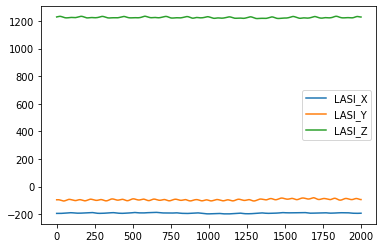

In [ ]:
carpeta_original = ruta_trabajo / 'Vicon'
nombreArchivo = 'ViconCiclismo-1.csv'
separador = ','

#carga el archivo
Datos = read_vicon_csv(carpeta_original / nombreArchivo, nomBloque='Trajectories') #nomBloque también puede ser 'Model Outputs' o 'Devices' según lo que contenga el archivo

print(Datos.head())
print(Datos.shape)

#Presenta una gráfica con los datos
Datos[['LASI_X', 'LASI_Y', 'LASI_Z']].plot()


Para abrir el bloque de modelos, basta con cambiar el parámetro de *nombloque*

   _Frame  _Sub Frame  ...  Right_Pedal_y  Right_Pedal_z
0     1.0         0.0  ...            NaN            NaN
1     2.0         0.0  ...        173.922        172.654
2     3.0         0.0  ...        171.019        171.513
3     4.0         0.0  ...        167.624        170.248
4     5.0         0.0  ...        163.738        168.883

[5 rows x 113 columns]
(2000, 113)


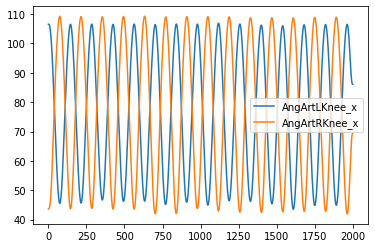

In [ ]:
Datos = read_vicon_csv(carpeta_original / nombreArchivo, nomBloque='Model Outputs')

print(Datos.head())
print(Datos.shape)

#Presenta una gráfica con los datos
Datos[['AngArtLKnee_x', 'AngArtRKnee_x']].plot()

# Manejo de archivos y carpetas para guardar datos

Otra parte importante de trabajar con datos es guardarlos en archivos después de procesarlos.

Utilizaremos también la librería *Pandas*, que utilizamos normalmente para cargar y procesar los datos. Tenemos varias opciones para gardar los archivos.

Primero cargamos las librerías que utilizaremos.

In [2]:
import os
from pathlib import Path #para gestión de archivos y carpetas
from google.colab import drive

import pandas as pd
import matplotlib.pyplot as plt

# Lo siguiente muestra un enlace para que otorguemos permiso para acceder a nuestro Drive
drive.mount('/googledrive', force_remount=True)

Mounted at /googledrive


 Abrimos un archivo cualquiera para tener datos.


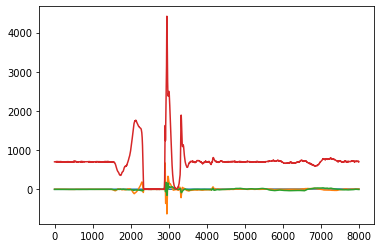

In [4]:
ruta_trabajo = Path('/googledrive/My Drive/Colab Notebooks/SeminarioProgramacionPython/ArchivosEjemplos/PlatFuerzas/Saltos')
nombre_archivo = 'BiowareSaltos-1.txt'
separador= '\t'

Datos = pd.read_csv(ruta_trabajo/nombre_archivo, header=17, skiprows=[18], sep=separador)

#Presenta los datos
plt.plot(Datos)

Después haríamos el procesado de los datos que necesitárasmos. Como ejemplo, creamos otra columna donde normalizamos los datos de fuerza vertical respecto al peso.

In [6]:
peso=Datos['Fz'][100:600].mean() #calcula el peso en una ventana de la parte inicial
Datos['FzNorm']=Datos['Fz']/peso #Crea una columna con la fuerza vertical normalizada dividiendo entre el peso
Datos

,abs time (s),Fx,Fy,Fz,FzNorm
0,0.000,1.340692,-1.545765,701.964775,0.997430
1,0.001,1.580361,-1.266329,703.393150,0.999460
2,0.002,1.380490,-1.426170,701.648857,0.996981
3,0.003,1.340692,-1.625571,702.282661,0.997882
4,0.004,1.460380,-1.426170,702.283669,0.997883
...,...,...,...,...,...
7995,7.995,7.693244,-4.482145,708.699646,1.007000
7996,7.996,7.853317,-4.362091,708.858414,1.007225
7997,7.997,8.092987,-4.242496,709.968094,1.008802
7998,7.998,8.013097,-4.362091,710.919220,1.010153


Vamos a guardar los archivos que creemos en una carpeta nueva dentro de la carpeta donde hemos cargado el archivo.

Primero tenemos que comprobar si la carpeta ya existe, y si no, la crea.

In [29]:
carpeta_output = ruta_trabajo / 'CarpetaProcesada'
if not carpeta_output.exists(): #comprueba si la carpeta ya existe
    carpeta_output.mkdir() #si no existe, la crea

## Archivos de texto

Podemos guardar archivos de texto con cualquier extensión y separador. Utilizamos la función Pandas *.to_csv*.

In [30]:
#Guarda como csv
Datos.to_csv(carpeta_output / 'ArchivoProcesado.csv', index=False) #por defecto lo guarda con coma como separador 

#Guarda como txt
Datos.to_csv(carpeta_output / 'ArchivoProcesado.txt', sep='\t', index=False) #también se puede guardar con otros separadores


## Archivos Excel

También podemos guardat archivos en formato Excel con mucho control sobre cómo se guardan los datos.

Lo más sencillo es guardar en una sola hoja.

In [31]:
#Guarda como excel en una sola hoja
Datos.to_excel(carpeta_output / 'ArchivoProcesado.xlsx', sheet_name='HojaDatos', index=False)

Pero también se pueden guardar varios dataframes de Pandas en hojas distintas.

In [32]:
#Creamos otro dataframes para guardar
Datos2=Datos*2 #crea otro dataframe distinto con los valores multiplicados por 2
Datos3=Datos/3 #crea otro dataframe distinto con los valores divididos por 3

with pd.ExcelWriter(carpeta_output / 'ArchivoProcesado-MultiplesHojas.xlsx') as writer: 
    Datos.to_excel(writer, sheet_name='Datos1', index=False)
    Datos2.to_excel(writer, sheet_name='Datos2', index=False)

Y se puede controlar la posición donde empiezan los datos dentro de la hoja de Excel.

In [33]:
with pd.ExcelWriter(carpeta_output / 'ArchivoProcesado-MultiplesHojas-ControlPosicion.xlsx') as writer: 
    Datos.to_excel(writer, sheet_name='Datos1', index=False)
    #para guardar empezando en una fila y columna específicas. Se pueden meter más de un dataframe en cada hoja, cuidando que no se solapen
    Datos2.to_excel(writer, sheet_name='Datos2', startrow=2, startcol=1, index=False)
    Datos3.to_excel(writer, sheet_name='Datos2', startrow=2, startcol=Datos2.shape[1]+3, index=False)

Si queremos añadir hojas a archivos que ya existen, para que no pisen los datos que ya había, hay que especificar el modo append incluyendo el parámetro *mode='a'*

In [36]:
Datos4=Datos3**2
with pd.ExcelWriter(carpeta_output / 'ArchivoProcesado-MultiplesHojas-ControlPosicion.xlsx', mode='a', engine='openpyxl') as writer:
    Datos4.to_excel(writer, sheet_name='Datos4', index=False)
